In [48]:
##########################################################################################
# DataFetcher
# AUTHOR: RUSLAN MASINJILA
##########################################################################################
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import numpy as np
import time
import os

# NUMBER OF COLUMNS TO BE DISPLAYED
pd.set_option('display.max_columns', 500)

# MAXIMUM TABLE WIDTH TO DISPLAY
pd.set_option('display.width', 1500)      
 
# ESTABLISH CONNECTION TO MT5 TERMINAL
if not mt5.initialize():
    print("initialize() FAILED, ERROR CODE =",mt5.last_error())
    quit()

In [49]:
# MT5 TIMEFRAME
MN1  = mt5.TIMEFRAME_MN1
W1  = mt5.TIMEFRAME_W1
D1  = mt5.TIMEFRAME_D1
H12 = mt5.TIMEFRAME_H12
H8  = mt5.TIMEFRAME_H8
H6  = mt5.TIMEFRAME_H6
H4  = mt5.TIMEFRAME_H4
H3  = mt5.TIMEFRAME_H3
H2  = mt5.TIMEFRAME_H2
H1  = mt5.TIMEFRAME_H1
M30 = mt5.TIMEFRAME_M30
M20 = mt5.TIMEFRAME_M20
M15 = mt5.TIMEFRAME_M15
M12 = mt5.TIMEFRAME_M12
M10 = mt5.TIMEFRAME_M10
M6  = mt5.TIMEFRAME_M6
M5  = mt5.TIMEFRAME_M5
M4  = mt5.TIMEFRAME_M4
M3  = mt5.TIMEFRAME_M3
M2  = mt5.TIMEFRAME_M2
M1  = mt5.TIMEFRAME_M1

numCandles     = 1000
offset         = 1
toDisplay =100
##########################################################################################

In [50]:
window = 50

rates_frame =  mt5.copy_rates_from_pos("EURUSD", M5, offset, numCandles)
rates_frame = pd.DataFrame(rates_frame)

rates_frame.rename(columns = {'close':'position'}, inplace = True)


rates_frame["position_mean"]=rates_frame['position'].rolling(window).mean()
rates_frame["position_std"]=rates_frame['position'].rolling(window).std()

rates_frame["velocity"] = rates_frame["position"].diff()
rates_frame["velocity_mean"] = rates_frame['velocity'].rolling(window).mean()
rates_frame["velocity_std"] = rates_frame['velocity'].rolling(window).std()

rates_frame["acceleration"] = rates_frame["velocity"].diff()
rates_frame["acceleration_mean"] = rates_frame['acceleration'].rolling(window).mean()
rates_frame["acceleration_std"] = rates_frame['acceleration'].rolling(window).std()



<AxesSubplot:>

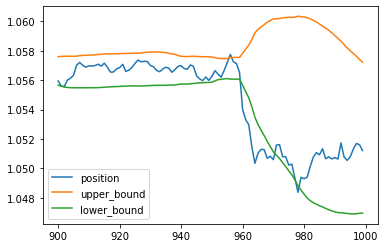

In [51]:
dfPosition = pd.DataFrame()

dfPosition["position"]    = rates_frame["position"]
dfPosition["upper_bound"] = rates_frame["position_mean"] + 2*rates_frame["position_std"]
dfPosition["lower_bound"] = rates_frame["position_mean"] - 2*rates_frame["position_std"]

dfPosition.tail(toDisplay).plot()

<AxesSubplot:>

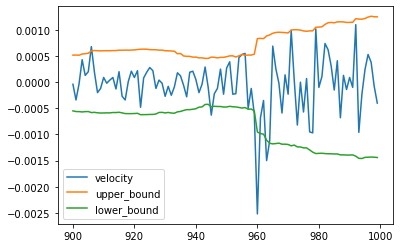

In [52]:
dfVelocity = pd.DataFrame()

dfVelocity["velocity"]    = rates_frame["velocity"]
dfVelocity["upper_bound"] = rates_frame["velocity_mean"] + 2*rates_frame["velocity_std"]
dfVelocity["lower_bound"] = rates_frame["velocity_mean"] - 2*rates_frame["velocity_std"]

dfVelocity.tail(toDisplay).plot()

<AxesSubplot:>

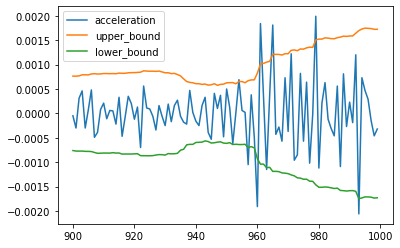

In [53]:
dfAcceleration = pd.DataFrame()

dfAcceleration["acceleration"]    = rates_frame["acceleration"]
dfAcceleration["upper_bound"] = rates_frame["acceleration_mean"] + 2*rates_frame["acceleration_std"]
dfAcceleration["lower_bound"] = rates_frame["acceleration_mean"] - 2*rates_frame["acceleration_std"]

dfAcceleration.tail(toDisplay).plot()